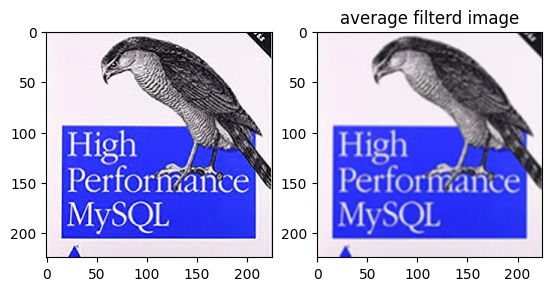

In [29]:
# lab-4 / median filter 
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
img = cv.imread('original image.jpeg')
average_img = cv.blur(img,(3,3))
fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(average_img)
plt.title("average filterd image")
cv.waitKey(0)
cv.destroyAllWindows()


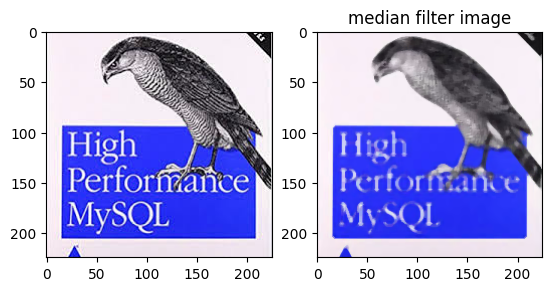

In [28]:
# lab-4 / median filter 
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
img = cv.imread('original image.jpeg')
dilated_img = cv.medianBlur(img,5)
fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(dilated_img)
plt.title("median filter image")
cv.waitKey(0)
cv.destroyAllWindows()


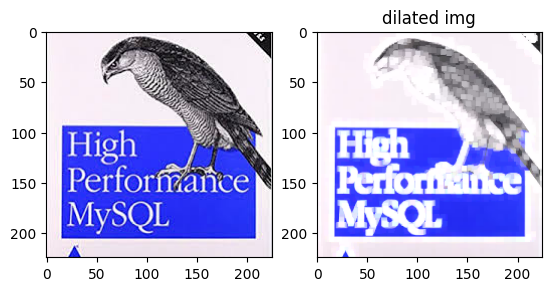

In [27]:
# lab-4 / dilate / التوسيع
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
img = cv.imread('original image.jpeg')
kernal = np.ones((5,5),np.float32)/25
dilated_img = cv.dilate(img,kernal)
fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(dilated_img)
plt.title("dilated img")
cv.waitKey(0)
cv.destroyAllWindows()


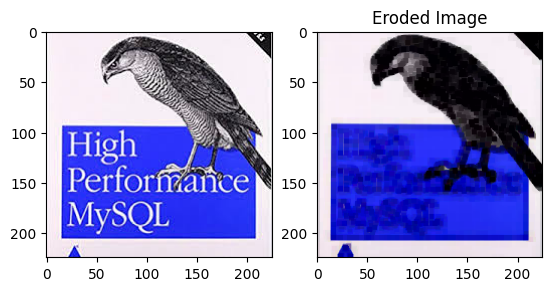

In [26]:
# lab-4 / Erosion / فلتر التأكل
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np
img = cv.imread('original image.jpeg')
kernal = np.ones((5,5),np.float32)/25
eroded_img = cv.erode(img,kernal)
fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(eroded_img)
plt.title("Eroded Image")
cv.waitKey(0)
cv.destroyAllWindows()


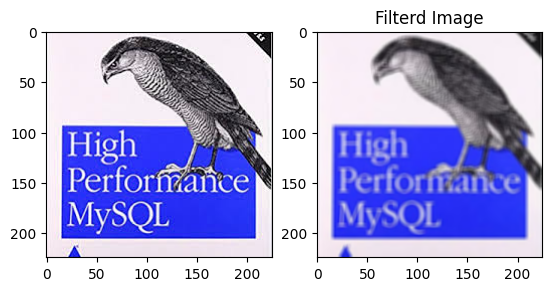

In [25]:
# lab-4 / (blurring filter) / فلتر التمويه
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

img = cv.imread('original image.jpeg')
kernal = np.ones((5,5),np.float32)/25
imgFilterd = cv.filter2D(img,-1,kernal)

fig,a = plt.subplots(nrows=1,ncols=2)
a[0].imshow(img)
a[1].imshow(imgFilterd)
plt.title("Filterd Image")
cv.waitKey(0)
cv.destroyAllWindows()


In [16]:
# lab-3
import cv2 as cv

img = cv.imread('original image.jpeg')

img_2 = img/50
cv.imshow('image / 2 ',img_2)
cv.waitKey(0)
cv.destroyAllWindows()



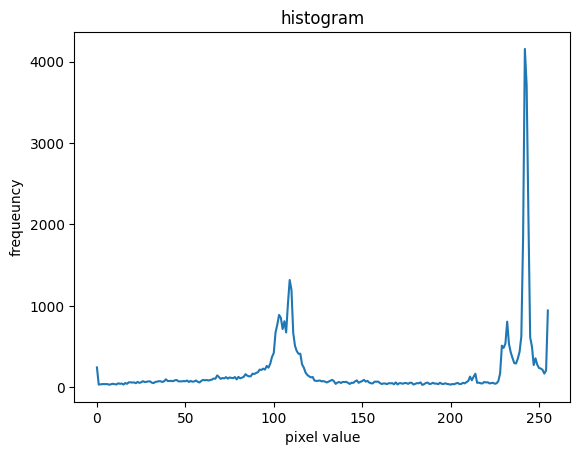

In [6]:
# lab-3
import cv2 as cv
import matplotlib.pyplot as plt 

img = cv.imread('original image.jpeg',cv.IMREAD_GRAYSCALE)
histogram = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram)
plt.title('histogram')
plt.xlabel('pixel value')
plt.ylabel('frequeuncy')
plt.show()


In [ ]:
# lab-2 / change colors

# read gbr for image 
import cv2 as cv
import numpy as np
img = cv.imread('original image.jpeg')
blue,green,red = cv.split(img)
merged = cv.merge([blue,green,red])
zero_blue = np.zeros_like(blue)
zero_green = np.zeros_like(green)
zero_red = np.zeros_like(red)

cv.imshow('red',cv.merge([zero_blue,zero_green,red]))
cv.imshow('green',cv.merge([zero_blue,green,zero_red]))
cv.imshow('blue',cv.merge([blue,zero_green,zero_red]))
cv.imshow('original',img)
cv.imshow('merged',merged)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
# lab-2 / read gbr for image 
import cv2 as cv
import numpy as np
img = cv.imread('original image.jpeg')
blue,green,red = cv.split(img)
cv.imshow('blue',blue)
cv.imshow('green',green)
cv.imshow('red',red)
cv.imshow('original',img)
cv.waitKey(0)
cv.destroyAllWindows()